In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
plt.rcParams['font.size'] = 20

In [4]:
location = 'nw2'
turbine = 'c02'
mode = 'SS2'

In [5]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')
selected_data_little = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_little.csv'))
selected_data_large = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_large.csv'))

smart_tracked_small_training = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_smart_tracked_modes_small_training.csv'))
smart_tracked_large_training = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_smart_tracked_modes_large_training.csv'))

In [6]:
from src.data.utils import get_input_data
from src.data.harmonics import *

data = get_input_data(data_folder, location, turbine)
harmonics_data = harmonics(data['turbine_data'].filter(regex='rpm'), [1,3,6, 9])

In [7]:
selected_columns = ['mean_NW2_C02_rpm', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'sin_mean_NW2_C02_yaw',
       'cos_mean_NW2_C02_yaw', 'sin_mean_NW2_C02_winddirection',
       'cos_mean_NW2_C02_winddirection',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature']

In [8]:
from src.data.make_dataset import create_input_target_dataset
X, y = create_input_target_dataset(data_folder, location, turbine, mode)

# little dataset
# Remove the selecyted data with duplicated timestamps and keep the one with the biggest size
little_selected_data_sorted = selected_data_little.sort_values(by='size', ascending=False)
little_selected_data_unique = little_selected_data_sorted.drop_duplicates(subset='timestamp', keep='first')
little_selected_data_unique = little_selected_data_unique.sort_values(by='timestamp')

y_train1 = little_selected_data_unique[['mean_frequency']].set_index(little_selected_data_unique['timestamp'])
y_train1.index = pd.to_datetime(y_train1.index)
y_train1 = y_train1.loc[y_train1.index.intersection(X.index)]
X_train1 = X.loc[y_train1.index]
X_train1 = X_train1[selected_columns]

#large dataset
# Remove the selecyted data with duplicated timestamps and keep the one with the biggest size
selected_data_sorted = selected_data_large.sort_values(by='size', ascending=False)
selected_data_unique = selected_data_sorted.drop_duplicates(subset='timestamp', keep='first')
selected_data_unique = selected_data_unique.sort_values(by='timestamp')

y_train2 = selected_data_unique[['mean_frequency']].set_index(selected_data_unique['timestamp'])
y_train2.index = pd.to_datetime(y_train2.index)
y_train2 = y_train2.loc[y_train2.index.intersection(X.index)]
X_train2 = X.loc[y_train2.index]
X_train2 = X_train2[selected_columns]

# smart tracked small dataset
y_train3 = smart_tracked_small_training[['frequency']].set_index(smart_tracked_small_training['timestamp'])
y_train3.index = pd.to_datetime(y_train3.index)
y_train3 = y_train3.loc[y_train3.index.intersection(X.index)]
X_train3 = X.loc[y_train3.index]
X_train3 = X_train3[selected_columns]

# smart tracked large dataset
y_train4 = smart_tracked_large_training[['frequency']].set_index(smart_tracked_large_training['timestamp'])
y_train4.index = pd.to_datetime(y_train4.index)
y_train4 = y_train4.loc[y_train4.index.intersection(X.index)]
X_train4 = X.loc[y_train4.index]
X_train4 = X_train4[selected_columns]


dropped mvbc columns:  {'mvbc_WandelaarMeasuringpile_Relative_humidity', 'mvbc_WandelaarBuoy_Sea_water_temperature'}


In [9]:
import pandas as pd
import seaborn as sns
df_little = X_train1.copy()
df_large = X_train2.copy()

df_smart_track_small = X_train3.copy()
df_smart_track_large = X_train4.copy()

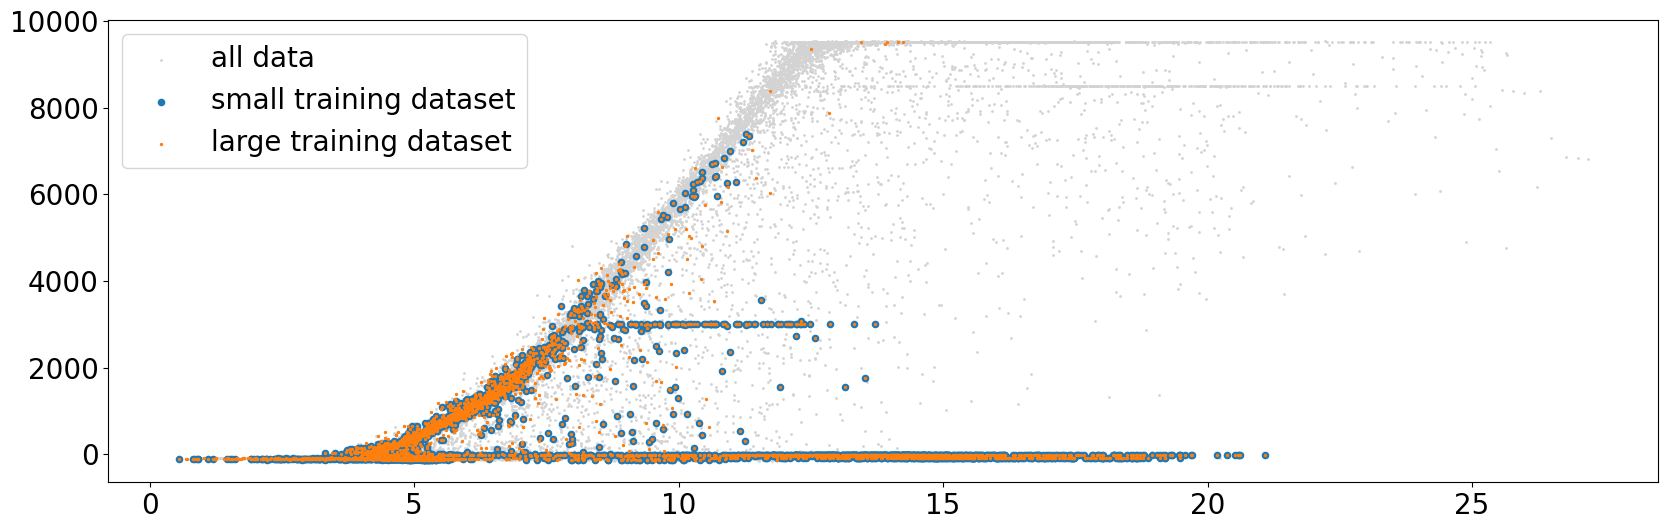

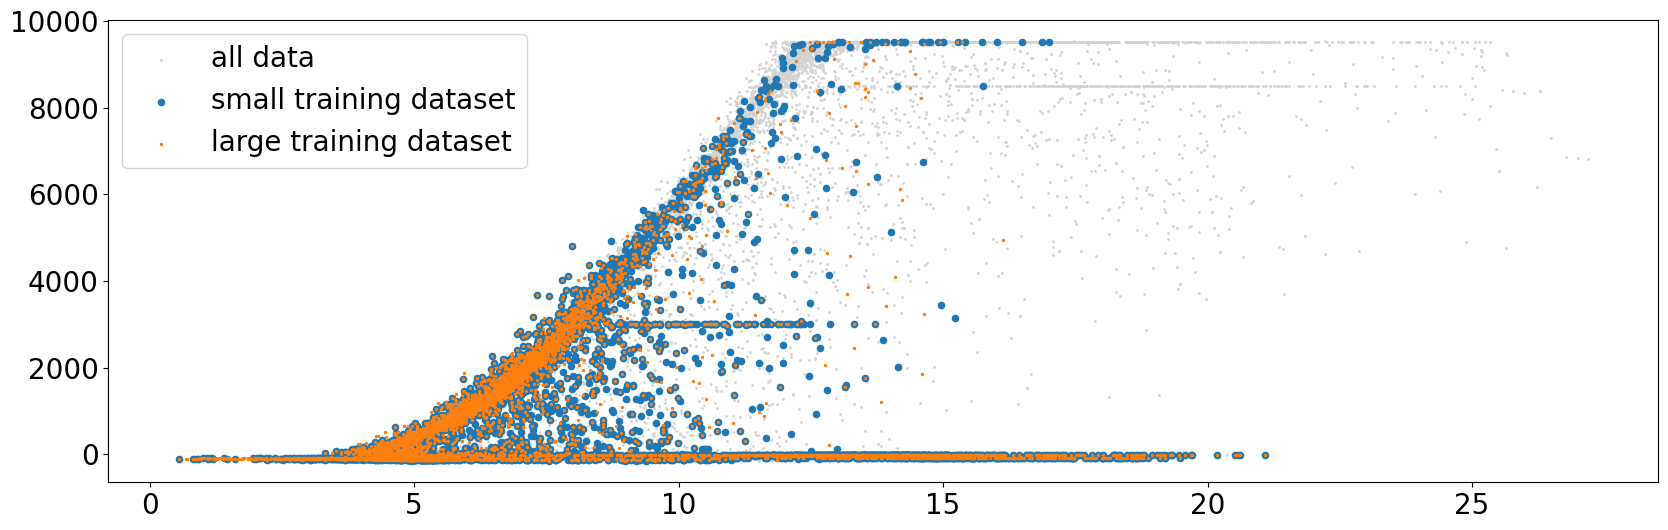

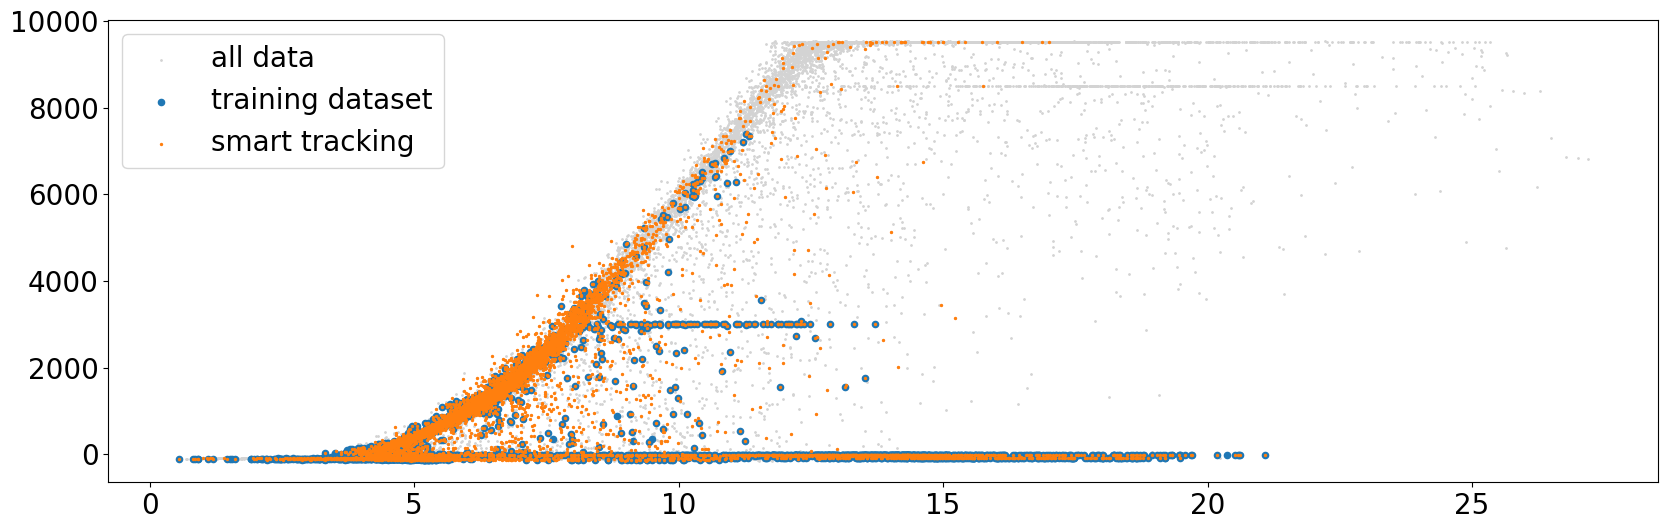

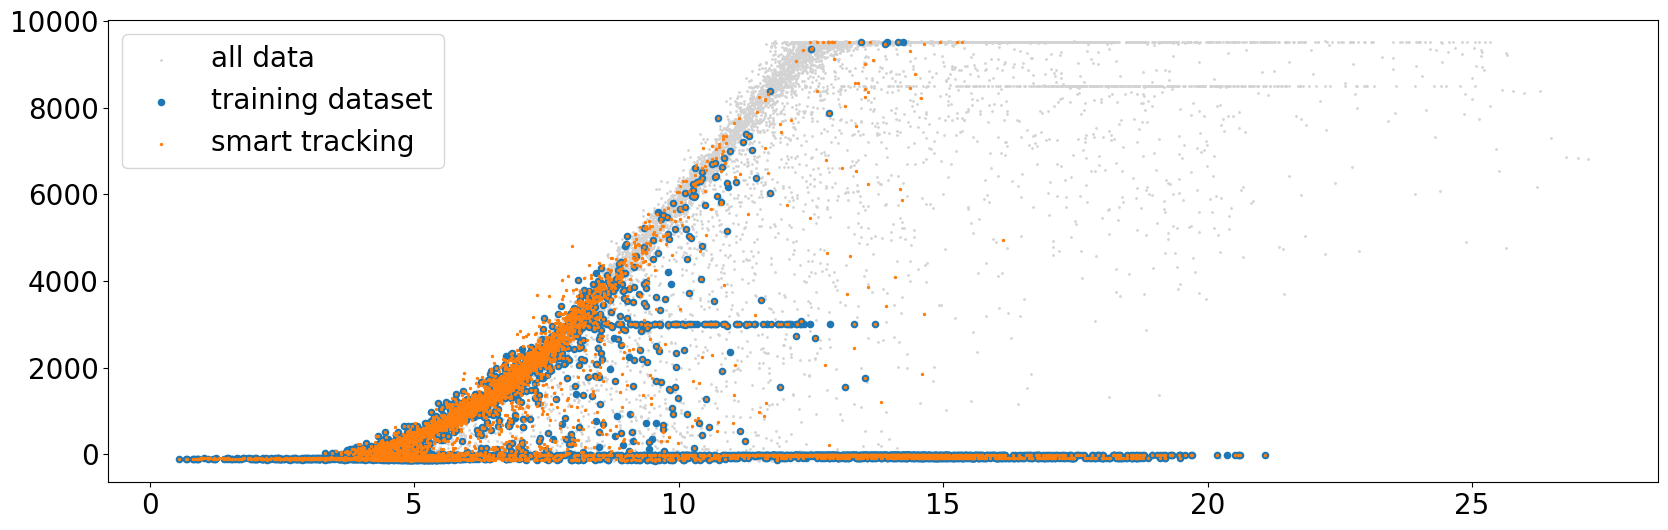

In [10]:
plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='power'), color='lightgrey', s=1, label='all data')
plt.scatter(df_little.filter(regex='windspeed'), df_little.filter(regex='power'), color='tab:blue', s=20, label='small training dataset')
plt.scatter(df_large.filter(regex='windspeed'), df_large.filter(regex='power'), color='tab:orange', s=2, label='large training dataset')
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='power'), color='lightgrey', s=1, label='all data')
plt.scatter(df_smart_track_small.filter(regex='windspeed'), df_smart_track_small.filter(regex='power'), color='tab:blue', s=20, label='small training dataset')
plt.scatter(df_smart_track_large.filter(regex='windspeed'), df_smart_track_large.filter(regex='power'), color='tab:orange', s=2, label='large training dataset')
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='power'), color='lightgrey', s=1, label='all data')
plt.scatter(df_little.filter(regex='windspeed'), df_little.filter(regex='power'), color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_small.filter(regex='windspeed'), df_smart_track_small.filter(regex='power'), color='tab:orange', s=2, label='smart tracking')
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='power'), color='lightgrey', s=1, label='all data')
plt.scatter(df_large.filter(regex='windspeed'), df_large.filter(regex='power'), color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_large.filter(regex='windspeed'), df_smart_track_large.filter(regex='power'), color='tab:orange', s=2, label='smart tracking')
plt.legend()
plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_28652\2323585717.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


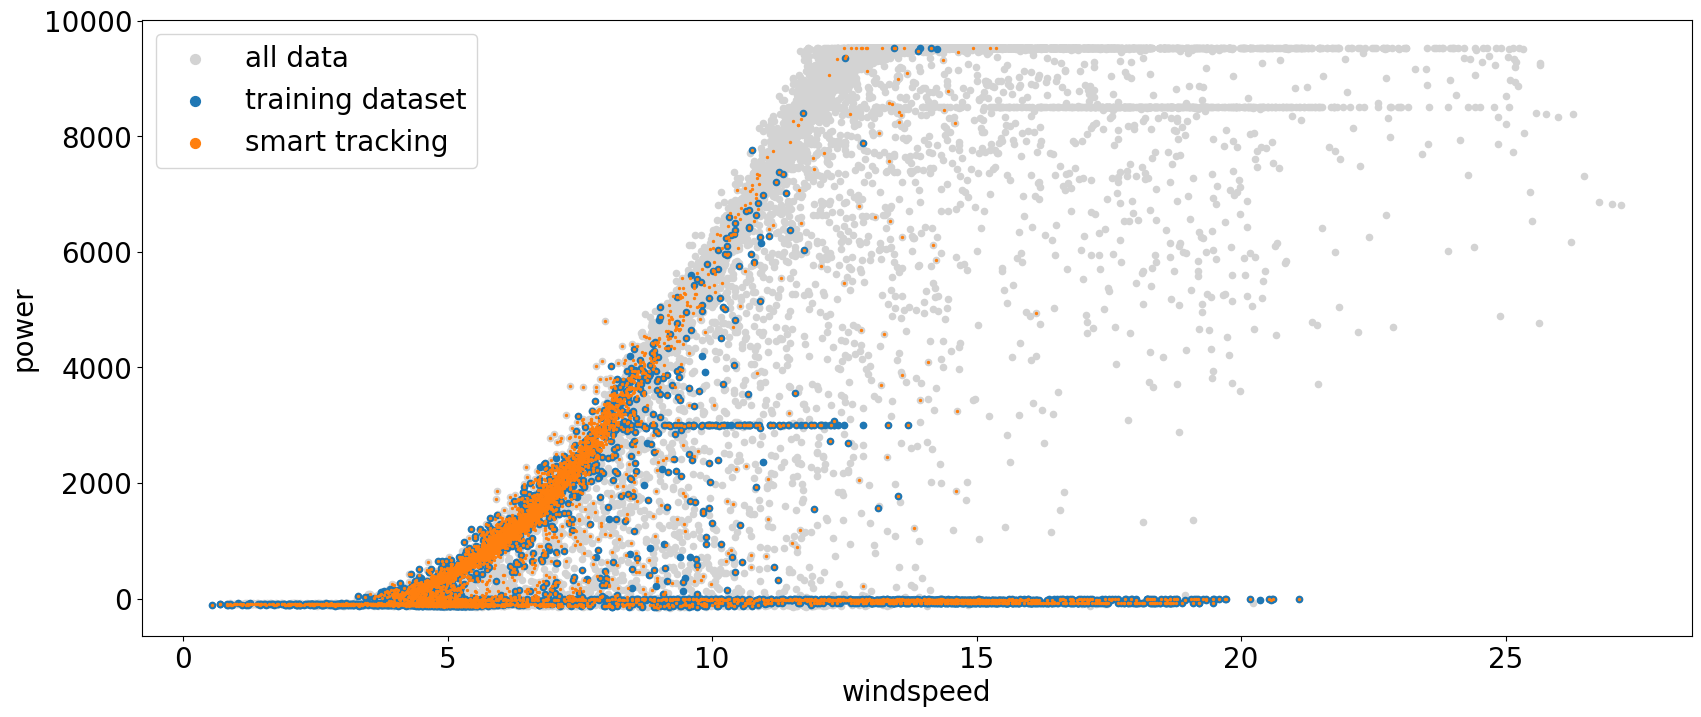

In [11]:
xlabel = 'windspeed'
ylabel = 'power'
plt.figure(figsize=(20, 8))
plt.scatter(X.filter(regex=xlabel), X.filter(regex=ylabel), color='lightgrey', s=20, label='all data')
plt.scatter(df_large.filter(regex=xlabel), df_large.filter(regex=ylabel), color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_large.filter(regex=xlabel), df_smart_track_large.filter(regex=ylabel), color='tab:orange', s=2, label='smart tracking')
legend = plt.legend()
for handles in legend.legendHandles:
    handles.set_sizes([50])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()
plt.close()

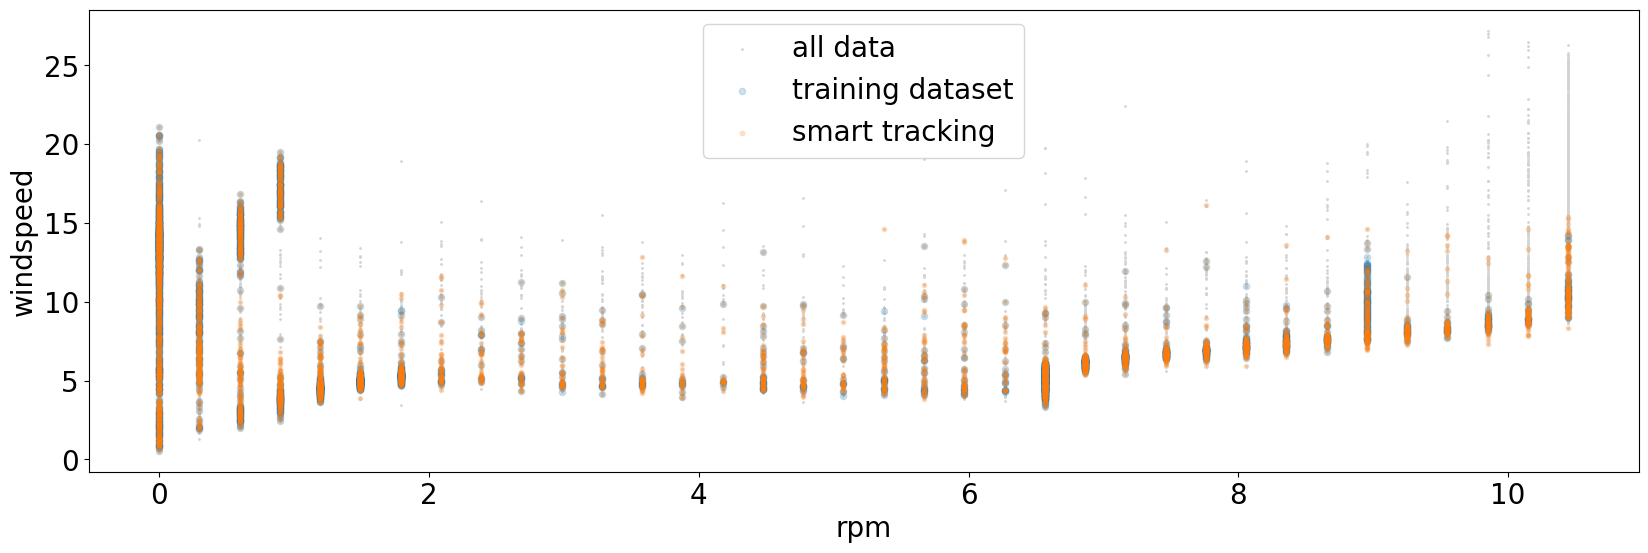

In [12]:
xlabel = 'rpm'
ylabel = 'windspeed'
plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex=xlabel), X.filter(regex=ylabel), color='lightgrey', s=1, label='all data')
plt.scatter(df_large.filter(regex=xlabel), df_large.filter(regex=ylabel), color='tab:blue', s=20, label='training dataset', alpha=0.2)
plt.scatter(df_smart_track_large.filter(regex=xlabel), df_smart_track_large.filter(regex=ylabel), color='tab:orange', s=10, label='smart tracking', alpha=0.2)
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()
plt.close()

In [13]:
df_large.loc[df_large[df_large[df_large.filter(regex='rpm').columns[0]] > 10].index]

,mean_NW2_C02_rpm,mean_NW2_C02_pitch,mean_NW2_C02_power,mean_NW2_C02_windspeed,sin_mean_NW2_C02_yaw,cos_mean_NW2_C02_yaw,sin_mean_NW2_C02_winddirection,cos_mean_NW2_C02_winddirection,mvbc_WandelaarBuoy_Wave_height,mvbc_WandelaarBuoy_Average_wave_period,mvbc_WandelaarMeasuringpile_Tide_TAW,mvbc_WandelaarMeasuringpile_Air_pressure,mvbc_WandelaarMeasuringpile_Air_temperature
timestamp,,,,,,,,,,,,,
2023-01-02 11:00:00+00:00,10.445,-1.147,7386.880,11.266,-0.721301,-0.692622,-0.718927,-0.695085,75.000000,3.060000,324.000000,1014.700000,8.800000
2023-01-02 11:10:00+00:00,10.445,-2.182,6032.512,10.113,-0.856186,-0.516668,-0.858450,-0.512897,75.000000,3.093333,314.333333,1014.700000,8.866667
2023-01-02 11:20:00+00:00,10.146,-1.287,4170.240,8.926,-0.882915,-0.469533,-0.881081,-0.472966,75.000000,3.126667,304.666667,1014.700000,8.933333
2023-02-10 12:00:00+00:00,10.445,-1.343,4774.464,9.344,-0.721639,-0.692269,-0.742257,-0.670116,46.000000,3.410000,102.000000,1035.000000,4.900000
2023-02-10 12:30:00+00:00,10.445,-2.154,6101.504,10.273,-0.661024,-0.750365,-0.687696,-0.725999,47.000000,3.320000,130.000000,1035.000000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 01:10:00+00:00,10.146,-1.203,4282.688,8.898,0.456555,-0.889695,0.448274,-0.893896,25.666667,2.643333,376.333333,1013.866667,13.566667
2023-05-09 05:50:00+00:00,10.146,-1.063,4133.440,8.637,0.326410,-0.945228,0.351678,-0.936121,32.666667,2.483333,237.666667,1010.800000,13.266667
2023-05-09 06:00:00+00:00,10.146,-1.091,4225.728,8.895,0.353965,-0.935259,0.373069,-0.927804,33.000000,2.480000,223.000000,1010.700000,13.300000


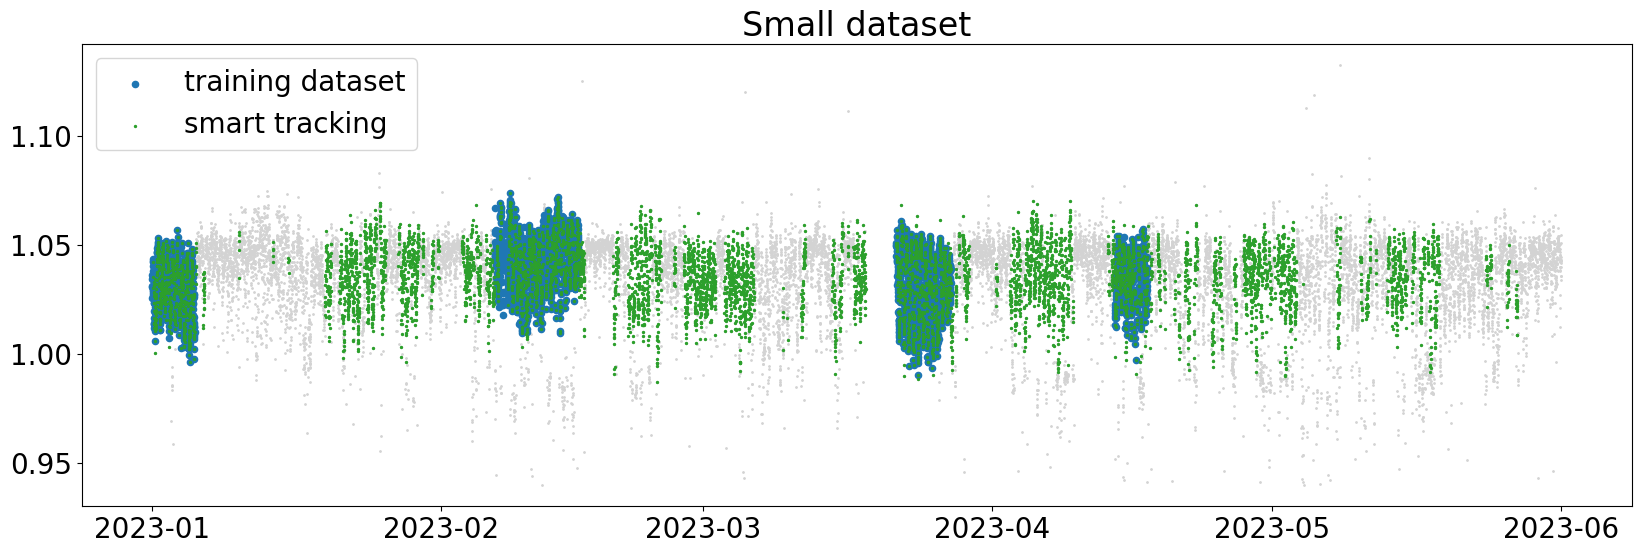

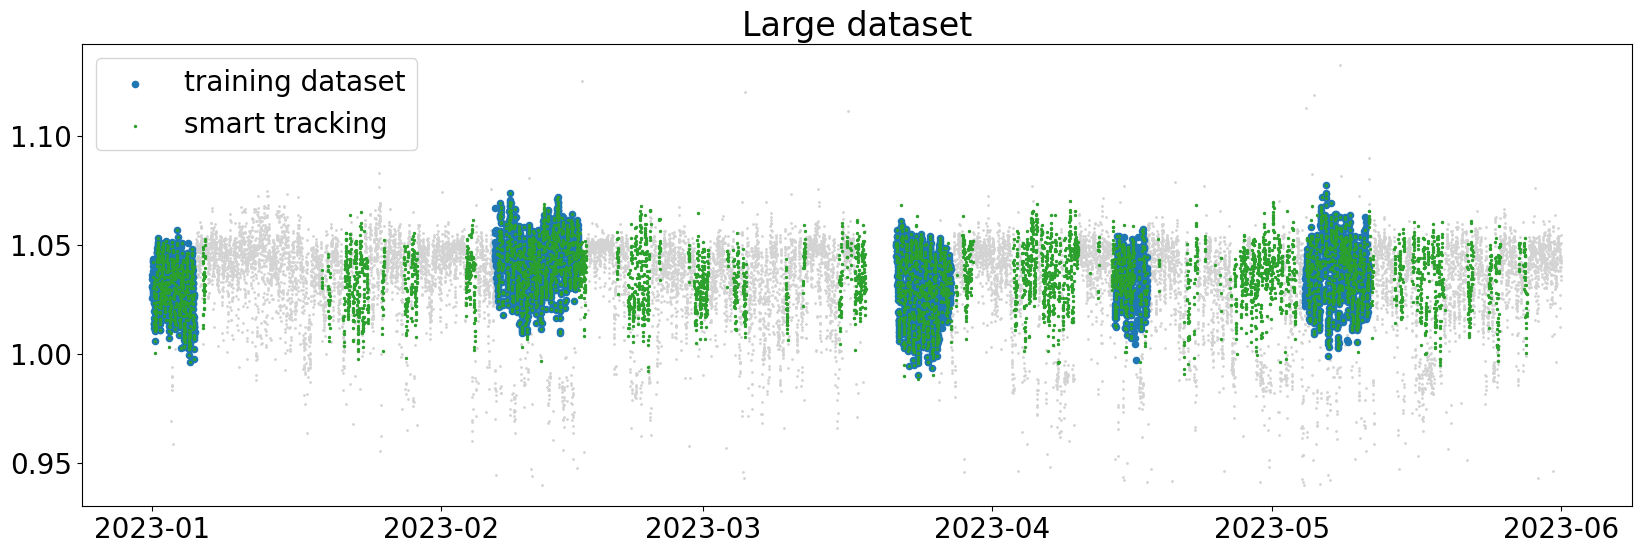

In [25]:
plt.figure(figsize=(20, 6))
plt.scatter(y.index, y, color='lightgrey', s=1)
plt.scatter(y_train1.index, y_train1, c='tab:blue', s=20, label='training dataset')
plt.scatter(y_train3.index, y_train3, c='tab:green', s=2, label='smart tracking')
plt.title('Small dataset')
#plt.scatter(y_train4_high_rpm.index, y_train4_high_rpm, c='tab:green', s=1, label='high rpm smart tracking')
legend = plt.legend()

plt.show()
plt.close()

y_train2_high_rpm = y_train2.loc[df_large[df_large[df_large.filter(regex='rpm').columns[0]] > 10].index]
y_train4_high_rpm = y_train4.loc[df_smart_track_large[df_smart_track_large[df_smart_track_large.filter(regex='rpm').columns[0]] > 10].index]
plt.figure(figsize=(20, 6))
plt.scatter(y.index, y, color='lightgrey', s=1)
plt.scatter(y_train2.index, y_train2, c='tab:blue', s=20, label='training dataset')
#plt.scatter(y_train2_high_rpm.index, y_train2_high_rpm, c='tab:orange', s=5, label='high rpm training dataset')
plt.scatter(y_train4.index, y_train4, c='tab:green', s=2, label='smart tracking')
#plt.scatter(y_train4_high_rpm.index, y_train4_high_rpm, c='tab:green', s=1, label='high rpm smart tracking')
legend = plt.legend()
plt.title('Large dataset')

plt.show()
plt.close()

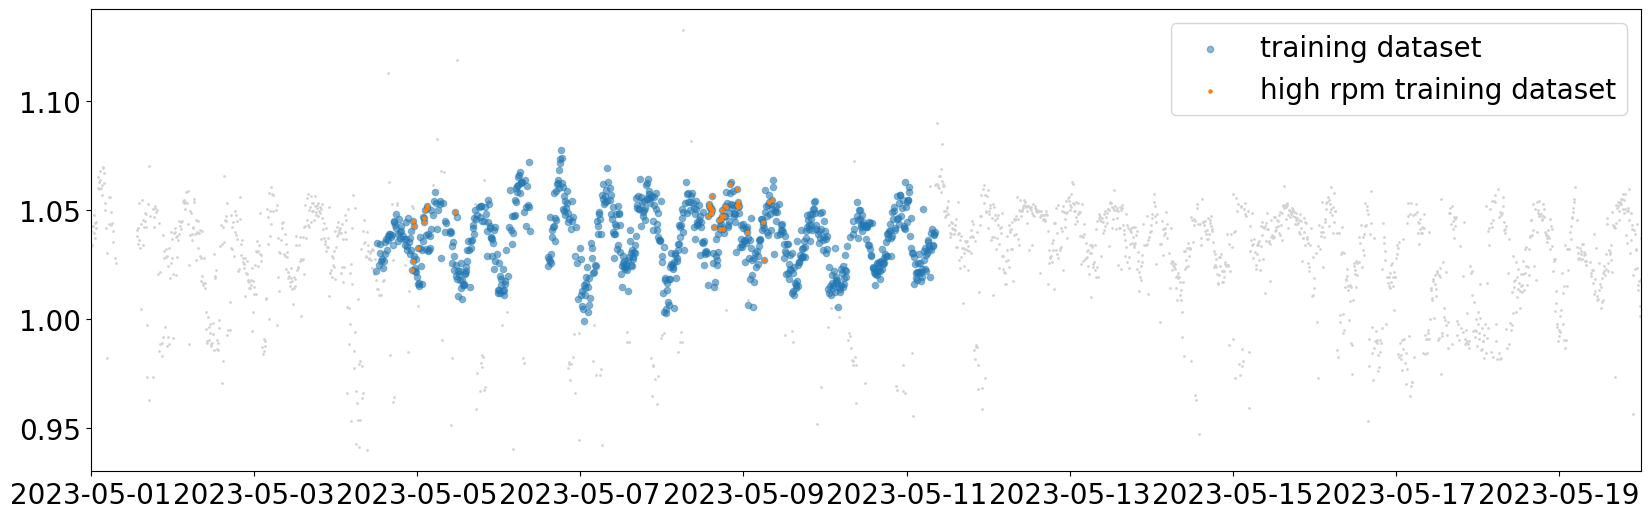

In [15]:
y_train2_high_rpm = y_train2.loc[df_large[df_large[df_large.filter(regex='rpm').columns[0]] > 10].index]
y_train4_high_rpm = y_train4.loc[df_smart_track_large[df_smart_track_large[df_smart_track_large.filter(regex='rpm').columns[0]] > 10].index]
plt.figure(figsize=(20, 6))
plt.scatter(y.index, y, color='lightgrey', s=1)
plt.scatter(y_train2.index, y_train2, c='tab:blue', s=20, label='training dataset', alpha=0.5)
plt.scatter(y_train2_high_rpm.index, y_train2_high_rpm, c='tab:orange', s=5, label='high rpm training dataset')
#plt.scatter(y_train4.index, y_train4, c='tab:green', s=2, label='smart tracking')
#plt.scatter(y_train4_high_rpm.index, y_train4_high_rpm, c='tab:purple', s=1, label='high rpm smart tracking')
plt.xlim([datetime.datetime(2023, 5, 1), datetime.datetime(2023, 5, 20)])
plt.legend()
plt.show()
plt.close()

In [16]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, nr_bins=20, width_divider=2, color='tab:blue', **kwargs):
    # Scatter plot
    ax.scatter(x, y, color=color, **kwargs)

    # Histogram on the attached axes
    # Calculate bin width
    bin_width = (x.values.max() - x.values.min()) / nr_bins

    # Calculate bin edges such that data points are centered in each bin
    bin_edges = np.linspace(x.values.min() - bin_width/2, x.values.max() + bin_width/2, nr_bins + 1)

    # Histogram on the attached axes
    #ax_histx.hist(x, bins=bin_edges, color=color)
    # Calculate the bin width as 1/3 the distance to the start of the next bin
    binwidth_x = (x.values.max() - x.values.min()) / (width_divider * nr_bins)

    #binwidth_y = (y.values.max() - y.values.min()) / nr_bins
    x_bins = np.arange(x.values.min()-binwidth_x/2, x.values.max() + binwidth_x/2 , binwidth_x)
    #y_bins = np.arange(y.values.min(), y.values.max() +binwidth_y, binwidth_y/2)
    ax_histx.hist(x, bins=x_bins, color=color)
    ax_histx.set_yscale('log')
    #ax_histy.hist(y, bins=y_bins, orientation='horizontal', color=color)


In [17]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, nr_bins=20, width_divider=2, color='tab:blue', **kwargs):
    # Scatter plot
    ax.scatter(x, y, color=color, **kwargs)

    # Calculate bin width based on the width_divider
    xbin_width = (x.values.max() - x.values.min()) / (width_divider*nr_bins)
    ybin_width = (y.values.max() - y.values.min()) / (width_divider*nr_bins)

    # Adjust start and end points to center bins
    xstart_point = x.values.min() - xbin_width / 2
    xend_point = x.values.max() + xbin_width / 2

    ystart_point = y.values.min() - ybin_width / 2
    yend_point = y.values.max() + ybin_width / 2

    # Calculate bin edges
    x_bins = np.arange(xstart_point, xend_point + xbin_width, xbin_width)
    y_bins = np.arange(ystart_point, yend_point + ybin_width, ybin_width)

    # Histogram on the attached axes
    ax_histx.hist(x, bins=x_bins, color=color)
    ax_histx.set_yscale('log')
    ax_histy.hist(y, bins=y_bins, orientation='horizontal', color=color)
    ax_histy.set_xscale('log')

C:\Users\Max\AppData\Local\Temp\ipykernel_28652\3619866303.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


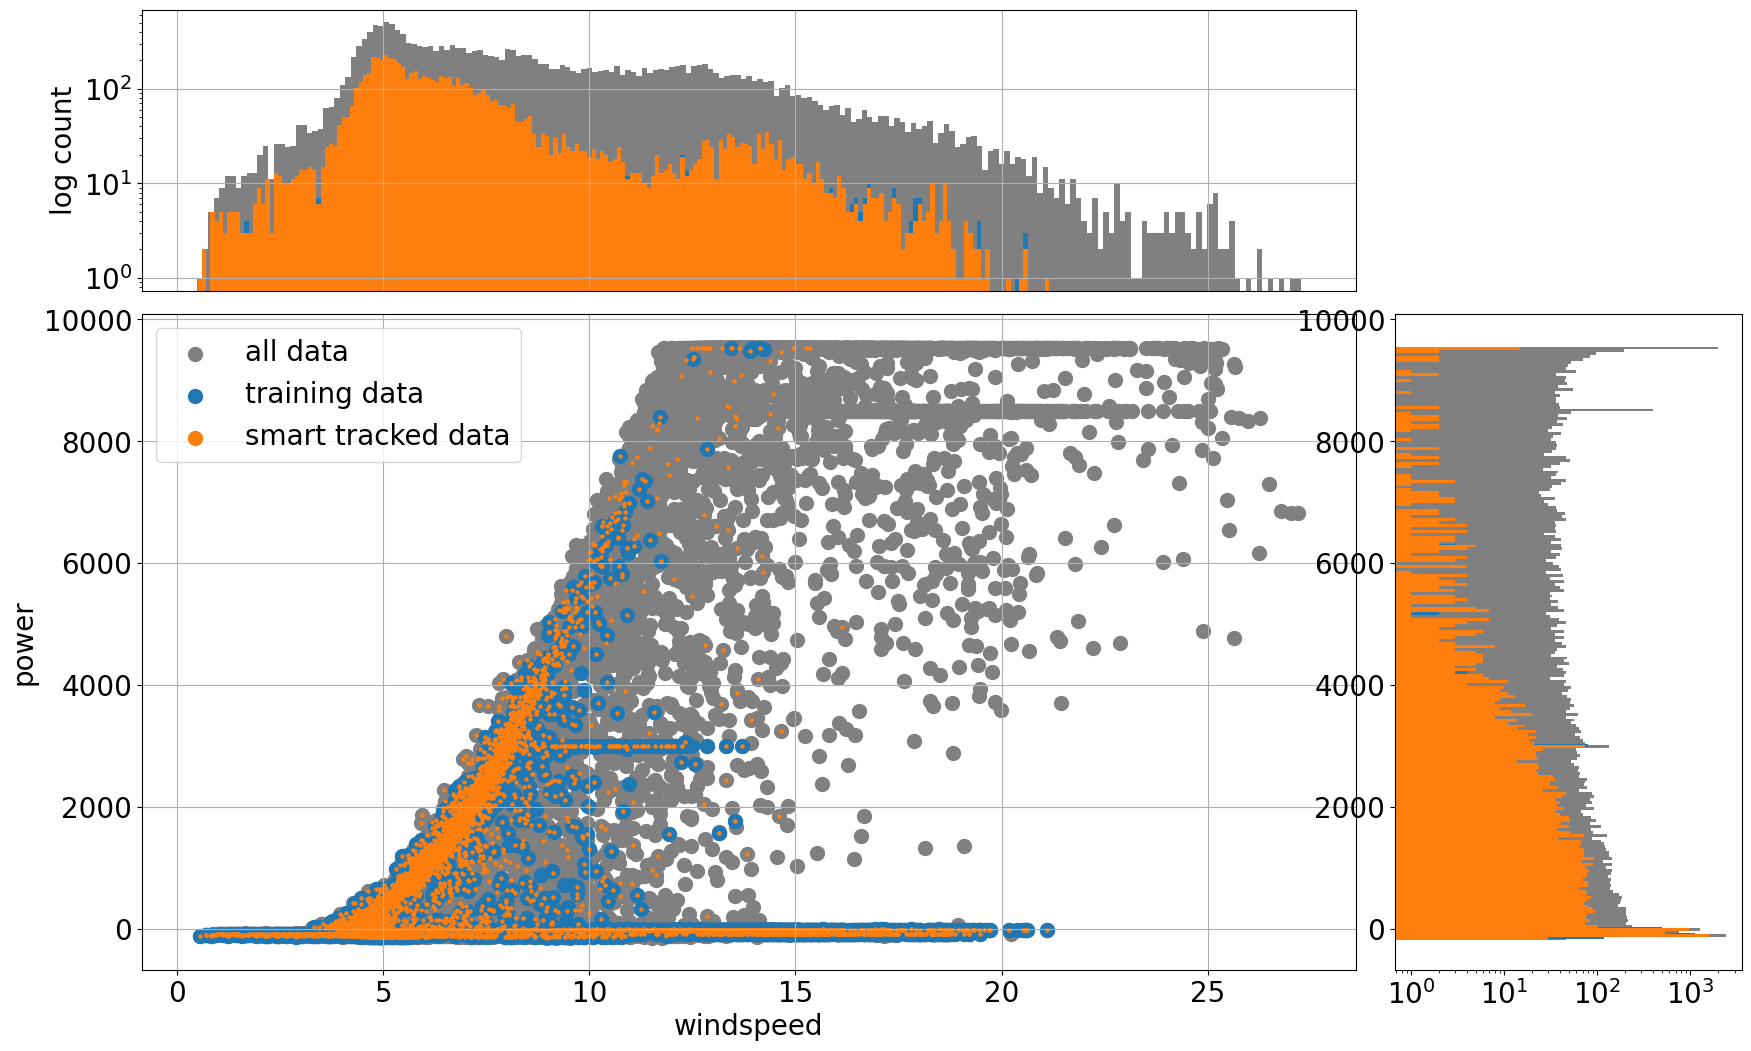

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Random data for demonstration


# Set up the axes with gridspec
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, width_ratios=(7, 2), height_ratios=(3, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
#Plt all data
x_ = X.filter(regex='windspeed')
y_ = X.filter(regex='power')
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=100, color='grey', label='all data', s=100)

x_ = df_large.filter(regex='windspeed')
y_ = df_large.filter(regex='power')
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=100, label='training data', s=100)

x_ = df_smart_track_large.filter(regex='windspeed')
y_ = df_smart_track_large.filter(regex='power')
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=100, width_divider=2, label='smart tracked data', color='tab:orange', s=5)

legend = ax.legend()
for handles in legend.legendHandles:
    handles.set_sizes([100.0])
ax_histx.grid()
ax_histx.set_ylabel('log count')
ax_histx.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.grid()
ax.set_xlabel('windspeed')
ax.set_ylabel('power')

plt.show()
plt.close()


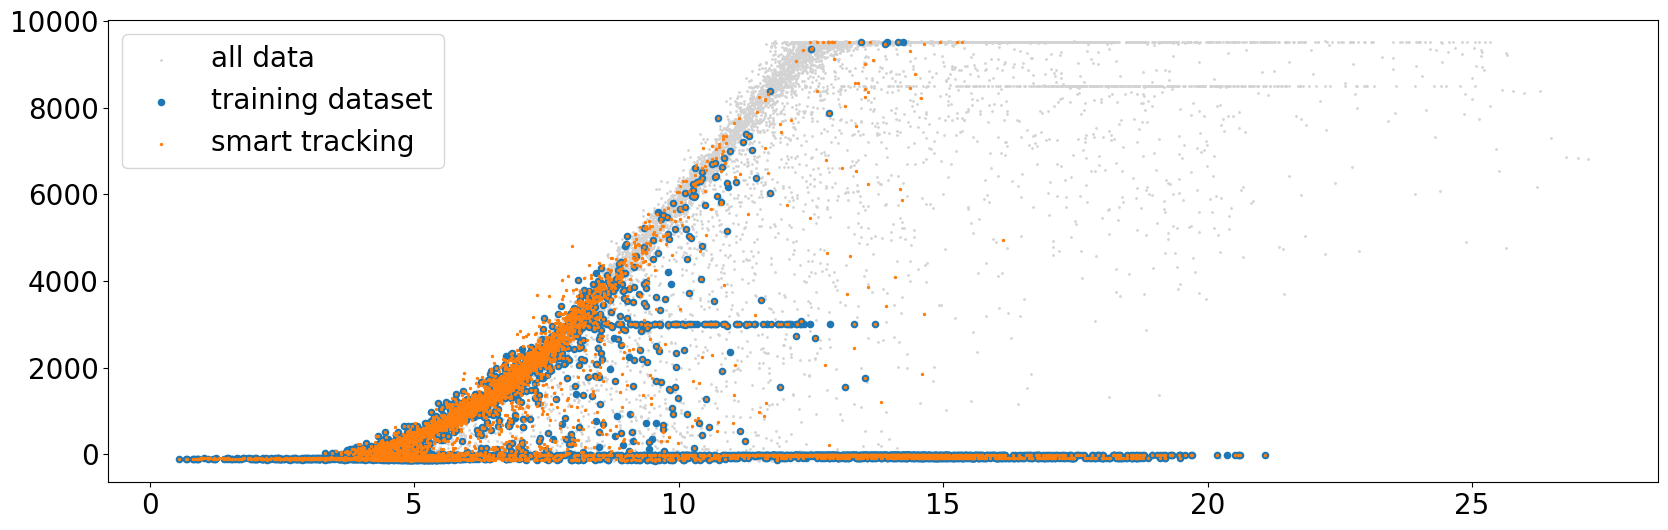

In [19]:

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='power'), color='lightgrey', s=1, label='all data')
plt.scatter(df_large.filter(regex='windspeed'), df_large.filter(regex='power'), color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_large.filter(regex='windspeed'), df_smart_track_large.filter(regex='power'), color='tab:orange', s=2, label='smart tracking')
plt.legend()
plt.show()
plt.close()

In [20]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, nr_bins=20, width_divider=2, color='tab:blue', **kwargs):
    # Scatter plot
    ax.scatter(x, y, color=color, **kwargs)

    # Calculate bin width based on the width_divider
    xbin_width = (x.values.max() - x.values.min()) / (width_divider*nr_bins)

    # Adjust start and end points to center bins
    xstart_point = x.values.min() - xbin_width / 2
    xend_point = x.values.max() + xbin_width / 2

    # Calculate bin edges
    x_bins = np.arange(xstart_point, xend_point + xbin_width, xbin_width)
    
    # Histogram on the attached axes
    ax_histx.hist(x, bins=x_bins, color=color)
    ax_histx.set_yscale('log')

C:\Users\Max\AppData\Local\Temp\ipykernel_28652\3570415676.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


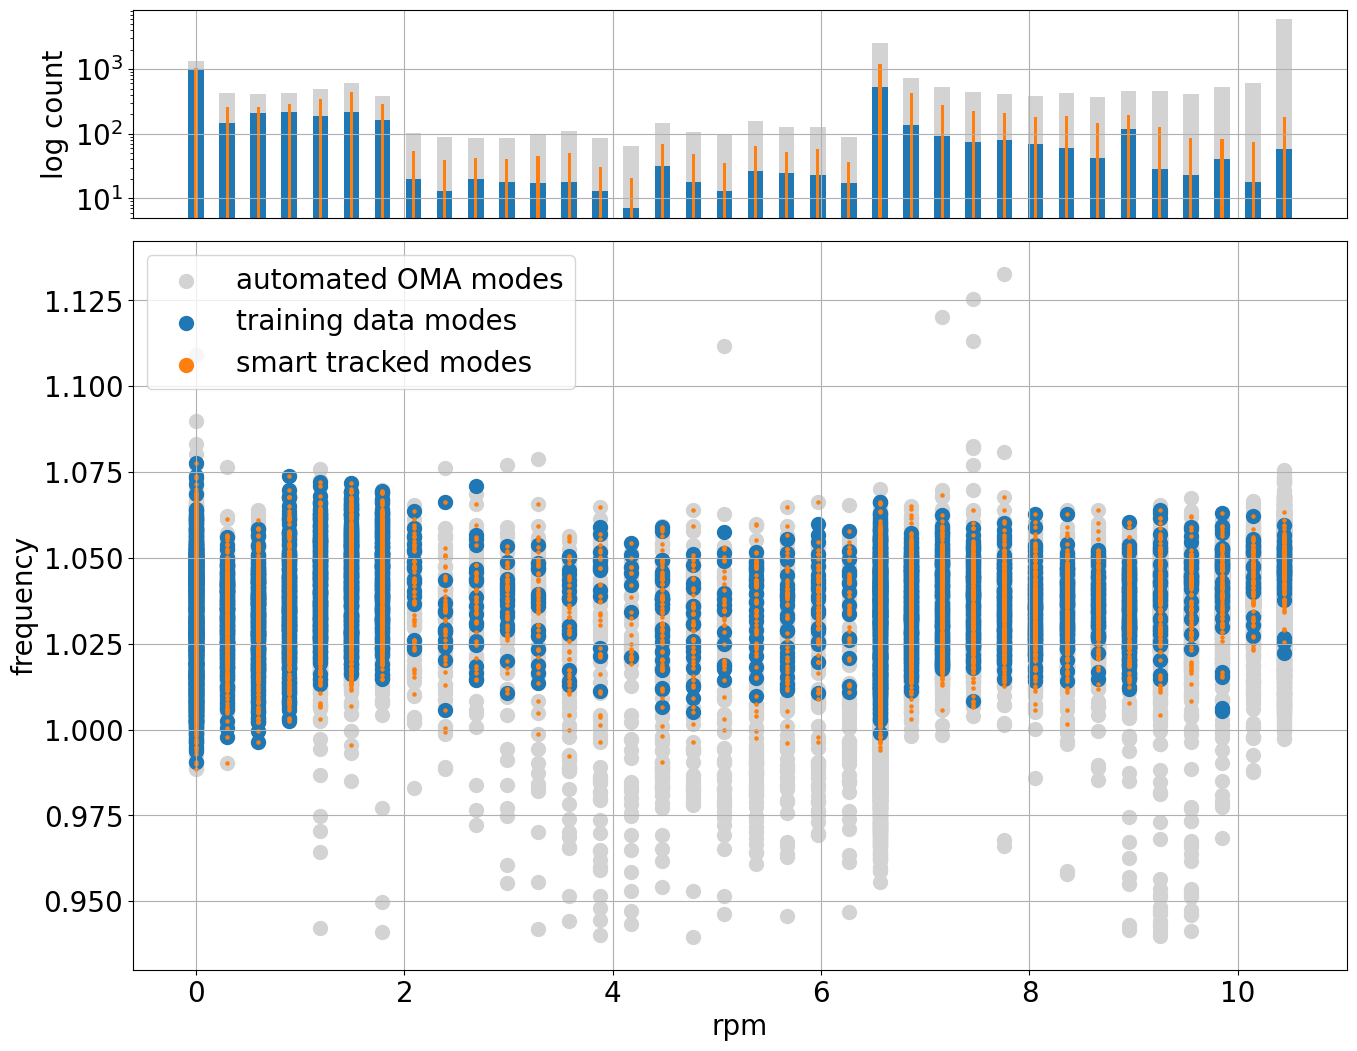

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Random data for demonstration


# Set up the axes with gridspec
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
#Plt all data
x_ = X.filter(regex='rpm').copy()
y_ = y.copy()
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=35, color='lightgrey', label='automated OMA modes', s=100)

x_ = df_large.filter(regex='rpm').copy()
y_ = y_train2.copy()
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=35, label='training data modes', s=100)

x_ = df_smart_track_large.filter(regex='rpm').copy()
y_ = y_train4.copy()
scatter_hist(x_, y_, ax, ax_histx, ax_histy, nr_bins=35, width_divider=10, label='smart tracked modes', color='tab:orange', s=5)

legend = ax.legend()
for handles in legend.legendHandles:
    handles.set_sizes([100.0])
ax_histx.grid()
ax_histx.set_ylabel('log count')
ax_histx.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.grid()
ax.set_xlabel('rpm')
ax.set_ylabel('frequency')

plt.show()
plt.close()


In [22]:
X.filter(regex='rpm').values[:,0]

array([ 0.   ,  0.   ,  0.   , ..., 10.445, 10.445, 10.445])

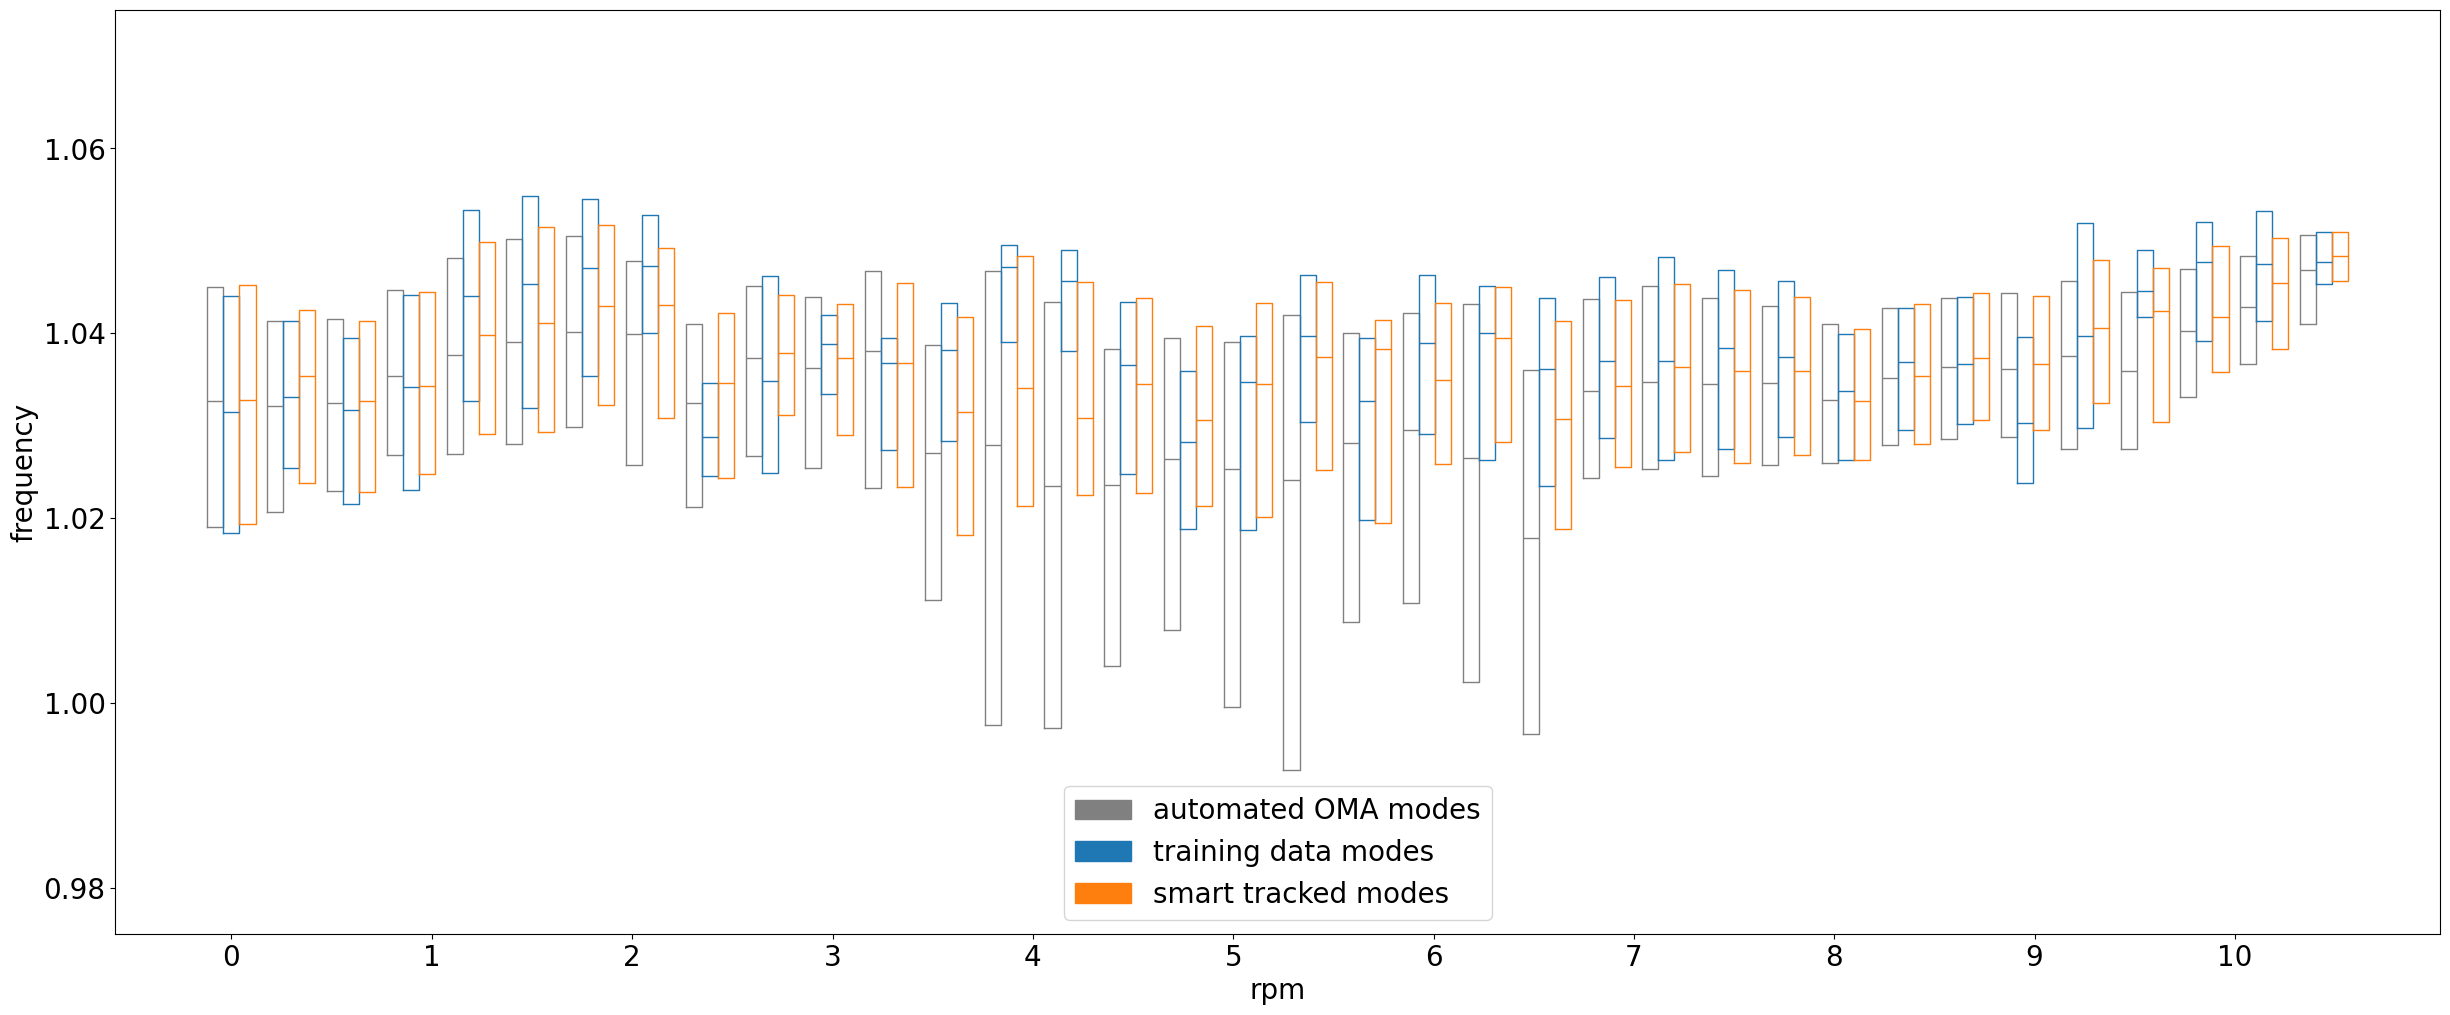

In [23]:
import matplotlib.patches as mpatches
boxplot_data1 = pd.DataFrame({'frequency':y.values.copy(), 'rpm':X.filter(regex='rpm').values[:,0]})
boxplot_data2 = pd.DataFrame({'frequency':y_train2.values[:,0], 'rpm':df_large.filter(regex='rpm').values[:,0]})
boxplot_data3 = pd.DataFrame({'frequency':y_train4.values[:,0], 'rpm':df_smart_track_large.filter(regex='rpm').values[:,0]})

rpms = np.unique(boxplot_data1['rpm'])
plt.figure(figsize=(30,12))

# Define color for each boxplot
colors = ['grey', 'tab:blue', 'tab:orange']
width = 0.08
for rpm in rpms:
    # Make a boxplot at the x value of the rpm
    plt.boxplot(boxplot_data1[boxplot_data1['rpm']==rpm]['frequency'], widths=width, positions=[rpm - width],
                boxprops=dict(color=colors[0]),
                medianprops=dict(color=colors[0]),
                whiskerprops=dict(color=colors[0], visible=False),
                capprops=dict(color=colors[0], visible=False),
                flierprops=dict(color=colors[0], markeredgecolor=colors[0], visible=False))
    plt.boxplot(boxplot_data2[boxplot_data2['rpm']==rpm]['frequency'], widths=width, positions=[rpm],
                boxprops=dict(color=colors[1]),
                medianprops=dict(color=colors[1]),
                whiskerprops=dict(color=colors[1], visible=False),
                capprops=dict(color=colors[1], visible=False),
                flierprops=dict(color=colors[1], markeredgecolor=colors[1], visible=False))

    plt.boxplot(boxplot_data3[boxplot_data3['rpm']==rpm]['frequency'], widths=width, positions=[rpm +width],
                boxprops=dict(color=colors[2]),
                medianprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2], visible=False),
                capprops=dict(color=colors[2], visible=False),
                flierprops=dict(color=colors[2], markeredgecolor=colors[2], visible=False))

plt.ylabel('frequency')
plt.xlabel('rpm')
# Create a legend
legend_elements = [mpatches.Patch(color=colors[0], label='automated OMA modes'),
                   mpatches.Patch(color=colors[1], label='training data modes'),
                   mpatches.Patch(color=colors[2], label='smart tracked modes')]

plt.legend(handles=legend_elements)# Only show one x tick every 5 ticks
plt.xticks(np.arange(11), np.arange(11))
plt.ylim([0.975, 1.075])
plt.show()
plt.close()

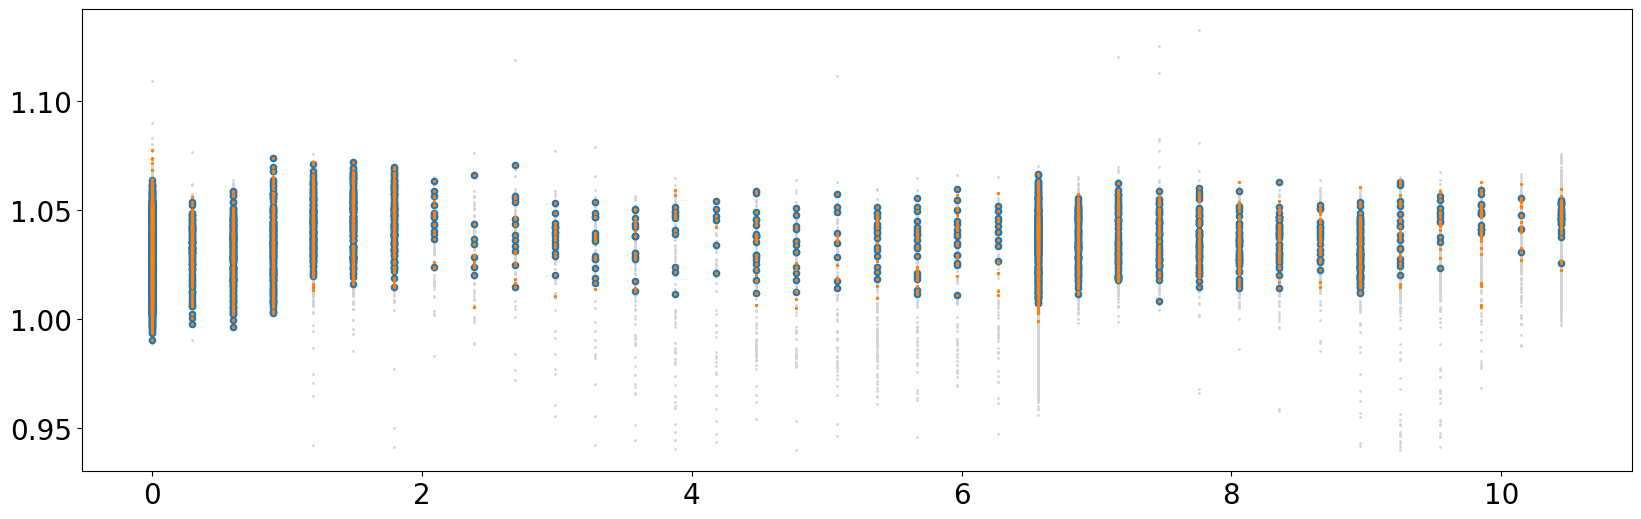

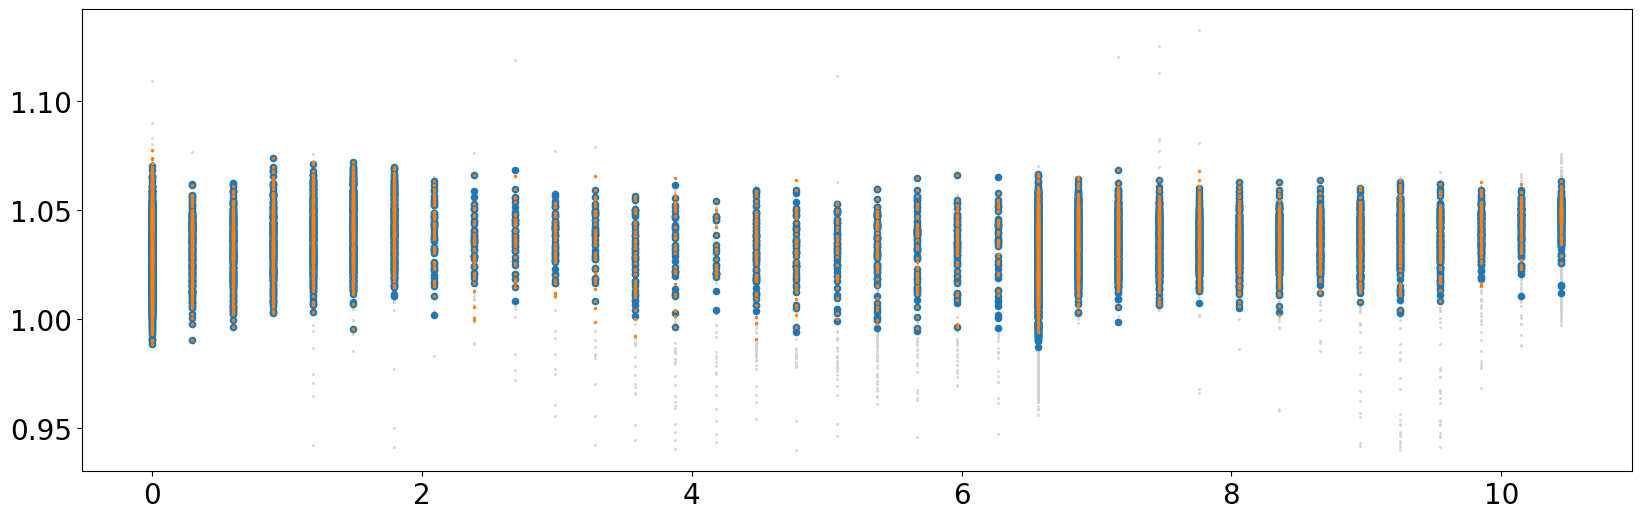

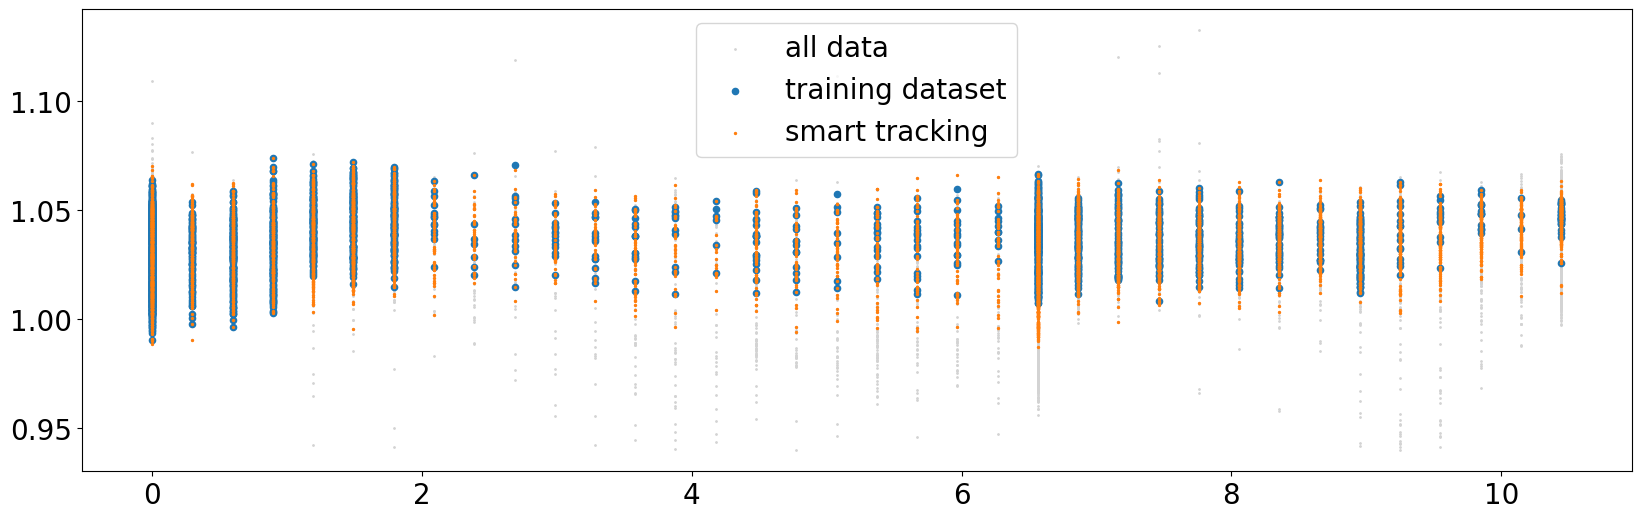

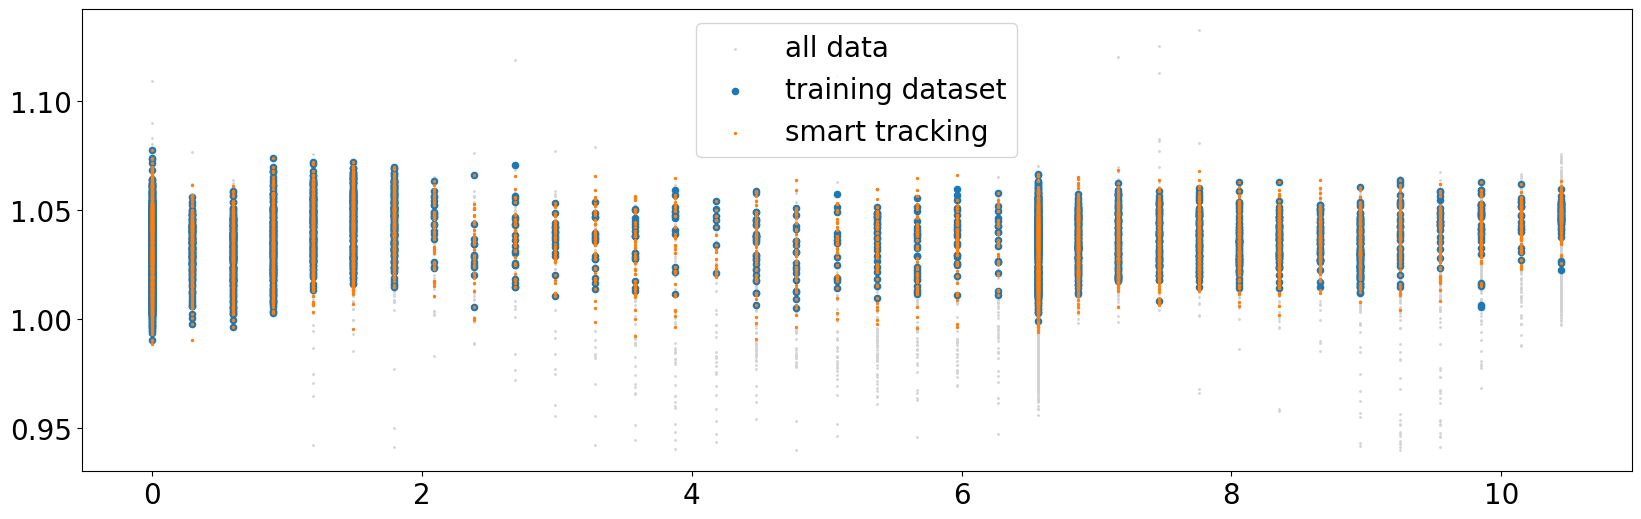

In [24]:
plt.figure(figsize=(20, 6))

plt.scatter(X.filter(regex='rpm'), y, color='lightgrey', s=1)
plt.scatter(df_little.filter(regex='rpm'), y_train1, color='tab:blue', s=20, label='small training dataset')
plt.scatter(df_large.filter(regex='rpm'), y_train2, color='tab:orange', s=2, label='large training dataset')
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='rpm'), y, color='lightgrey', s=1)
plt.scatter(df_smart_track_small.filter(regex='rpm'), y_train3, color='tab:blue', s=20, label='small training dataset')
plt.scatter(df_smart_track_large.filter(regex='rpm'), y_train4, color='tab:orange', s=2, label='large training dataset')
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='rpm'), y, color='lightgrey', s=1, label='all data')
plt.scatter(df_little.filter(regex='rpm'), y_train1, color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_small.filter(regex='rpm'), y_train3, color='tab:orange', s=2, label='smart tracking')
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(20, 6))
plt.scatter(X.filter(regex='rpm'), y, color='lightgrey', s=1, label='all data')
plt.scatter(df_large.filter(regex='rpm'), y_train2, color='tab:blue', s=20, label='training dataset')
plt.scatter(df_smart_track_large.filter(regex='rpm'), y_train4, color='tab:orange', s=2, label='smart tracking')
plt.legend()
plt.show()
plt.close()